In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import math
import numpy as np
import pandas as pd
from scipy.interpolate import spline
import sqlalchemy

engine = sqlalchemy.create_engine('mssql+pyodbc://sql2014a8/abm_13_2_3', echo=False)

df = pd.read_sql('SELECT * FROM ws.dbo.fn_lu_vehicle_trip_summary(166)', engine, index_col='mgra')

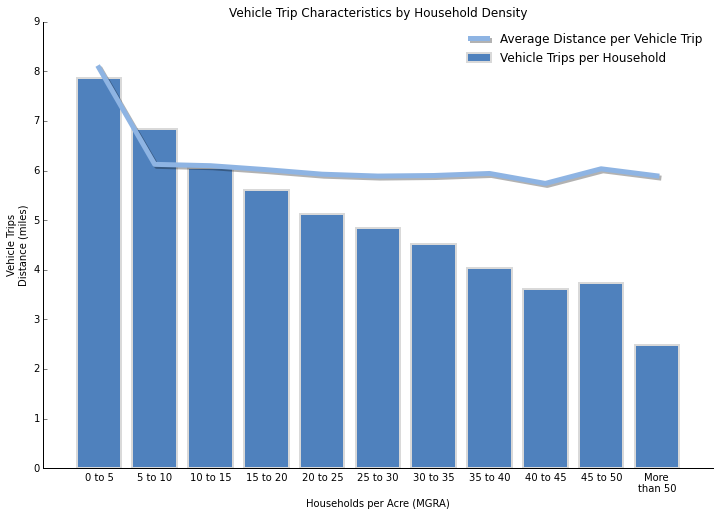

In [12]:
bins = np.append(np.arange(0,51,5), int(math.ceil(df['hh_acres'].max() / 5) * 5 + 1))
xticks = np.arange(len(bins)-1)

labels = []

for i in xrange(len(bins)-2):
    labels.append(str(bins[i]) + ' to ' + str(bins[i+1]))
    
labels.append('More\nthan ' + str(bins[len(bins) - 2]))

df_sums = df[['households']].groupby(pd.cut(df['hh_acres'], bins)).sum()
df_avgs = df[['veh_trips_hh','dist_veh_trip']].groupby(pd.cut(df['hh_acres'], bins)).mean()

proc_df = pd.concat([df_sums, df_avgs], axis=1)

plt.figure(figsize=(12,8), dpi=300)
plt.xlim(-1, 11)
plt.title('Vehicle Trip Characteristics by Household Density')
plt.xticks(xticks, labels)
plt.xlabel('Households per Acre (MGRA)')
plt.ylabel('Vehicle Trips\nDistance (miles)')

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('left')

b = plt.bar(xticks, df_avgs['veh_trips_hh'], 
            color=[79/255.,129/255.,189/255.], edgecolor=[.85,.85,.85], 
            linewidth=2, align='center', capstyle='round', 
            label='Vehicle Trips per Household')

p = plt.plot(xticks, df_avgs['dist_veh_trip'],
             lw=5, c=[142/255.,180/255.,227/255.], label='Average Distance per Vehicle Trip',
             path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])

plt.legend(loc='upper right', frameon=False)

plt.show()